In [1]:
import numpy as np
from data3 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate, distance
from kMeans import kMeans, min_k_index, max_k_index
from LocalL1 import locaL1
import copy

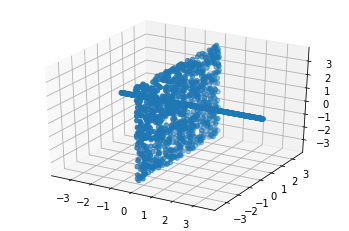

In [2]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [3]:
n_sample=len(data[0])
n_feature=len(data)

In [4]:
# set alpha=0.01 and K=500,k=100, better performance
alpha=0.01
K=500
k=100

In [5]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))

In [6]:
B=locaL1(data,indexs,B,alpha,k)
B=np.abs(B)

In [7]:
L=get_laplace(B)

In [8]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

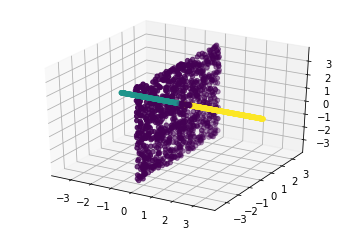

In [9]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [10]:
# compare with KNN
W=knn_laplace(data,8)
u1,v1=np.linalg.eig(W)
u1=np.real(u1)
v1=np.real(v1)

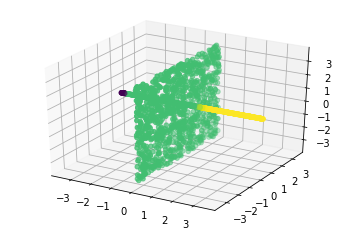

In [11]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v1[:,min_k_index(u1,2)])